In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
PATH = 'data.csv'
df = pd.read_csv(PATH)
df = df.drop(['Column1', 'index'], axis=1)
df.head(5)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


# Анализ
Данные взяты с https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis?resource=download

Обратим внимание на ряд числовых показателей:
- `Year` - год, в котором произошла транзакция;
- `Customer Age` - возраст клиента;
- `Quantity` - количество проданного товара;
- `Unit Cost` - стоимость производства или приобретения одной единицы продукта;
- `Unit Price` - цена, по которой была продана одна единица товара;
- `Cost` - общая стоимость проданной продукции, которая рассчитывается как произведение количества на себестоимость единицы;
- `Revenue` - общий доход, полученный от продаж, который рассчитывается как произведение количества и цены за единицу.

В столбце `Year` указано среднее значение 2015,569 и стандартное отклонение 0,495, что указывает на то, что данные в основном относятся к 2016 году, но есть и некоторые данные за 2015 год.

Средний возраст покупателя `Customer Age` - **36.4**, что достаточно близко к значению 50% квантиля, представляющего собой медиану выборки.

Столбец `Quantity` имеет среднее значение 2,002524 и стандартное отклонение 0,813936, что указывает на то, что большинство покупок предполагает покупку 2 единиц товара.

Столбец `Unit Cost` имеет среднее значение 349,880567 и стандартное отклонение 490,015846, что показывает, что стоимость товара варьируется в широких пределах: некоторые товары стоят всего 0,67, а другие - 3240.

Столбец `Unit Price` имеет среднее значение 389,232485 и стандартное отклонение 525,319091, что указывает на то, что цена товара также варьируется в широких пределах: некоторые товары продаются всего за 0,67, а другие - за 5082.

В столбце `Cost` среднее значение составляет 576,004532, а стандартное отклонение - 690,500395, что несколько выше средней стоимости единицы, что указывает на то, что большинство покупок совершается для нескольких единиц.

Столбец `Revenue` имеет среднее значение 640,870093 и стандартное отклонение 736,640033, что говорит о том, что разница между затратами на производство или покупку товаров и доходом, получаемым от их продажи, относительно невелика. Другими словами, норма прибыли по товарам относительно невелика, если выручка лишь немного превышает затраты.

In [ ]:
df.describe()

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000
mean,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093
std,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033
min,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


In [ ]:
df.loc[:, df.isna().any()]

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0
34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0
34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0


In [ ]:
df.isnull().sum()

Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

Необходимо убрать пропуски в данных для корректной обработки в дальнейшем. Пропуски заменяются на медианные значения.

In [ ]:
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].median())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Unit Cost'] = df['Unit Cost'].fillna(df['Unit Cost'].median())
df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].median())
df['Cost'] = df['Cost'].fillna(df['Cost'].median())

Удалим из данных покупкии, стоимость которых более 2500

In [ ]:
index_list = df[df['Cost'] > 2500].index
df = df.drop(index_list)

# Проверка возраста на нормальное распределение

### Визуальный анализ (гистограммы)

Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Мы можем видеть, что серьёзные выводы можно соделать относительно распределения параметров `Unit Cost`, `Unit Price` и `Cost` - они распределены точно не нормально.

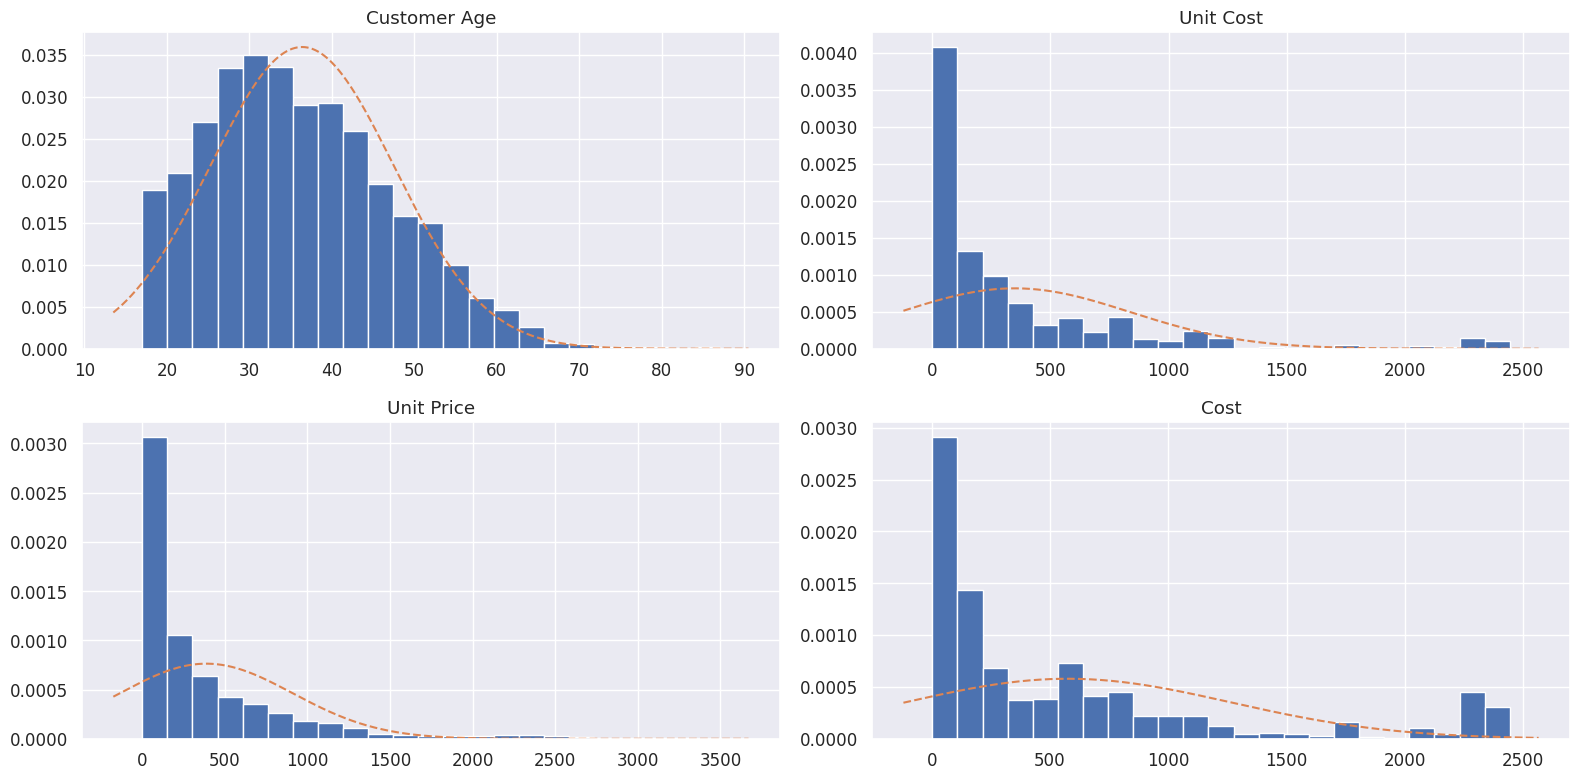

In [ ]:
keys = ['Customer Age', 'Unit Cost', 'Unit Price', 'Cost']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

for key, ax in zip(keys, axes.flatten()):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

plt.tight_layout()

### Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближке график к графику ${y = x}$, тем более нормальным является распределение значений выборки.

Как мы и говорили ранее `Unit Cost`, `Unit Price` и `Cost` не являются распределёнными нормально. Тогда как `Customer Age` распределён относительно нормально (учитывая, что в данных учавствуют только люди старше 16 лет).

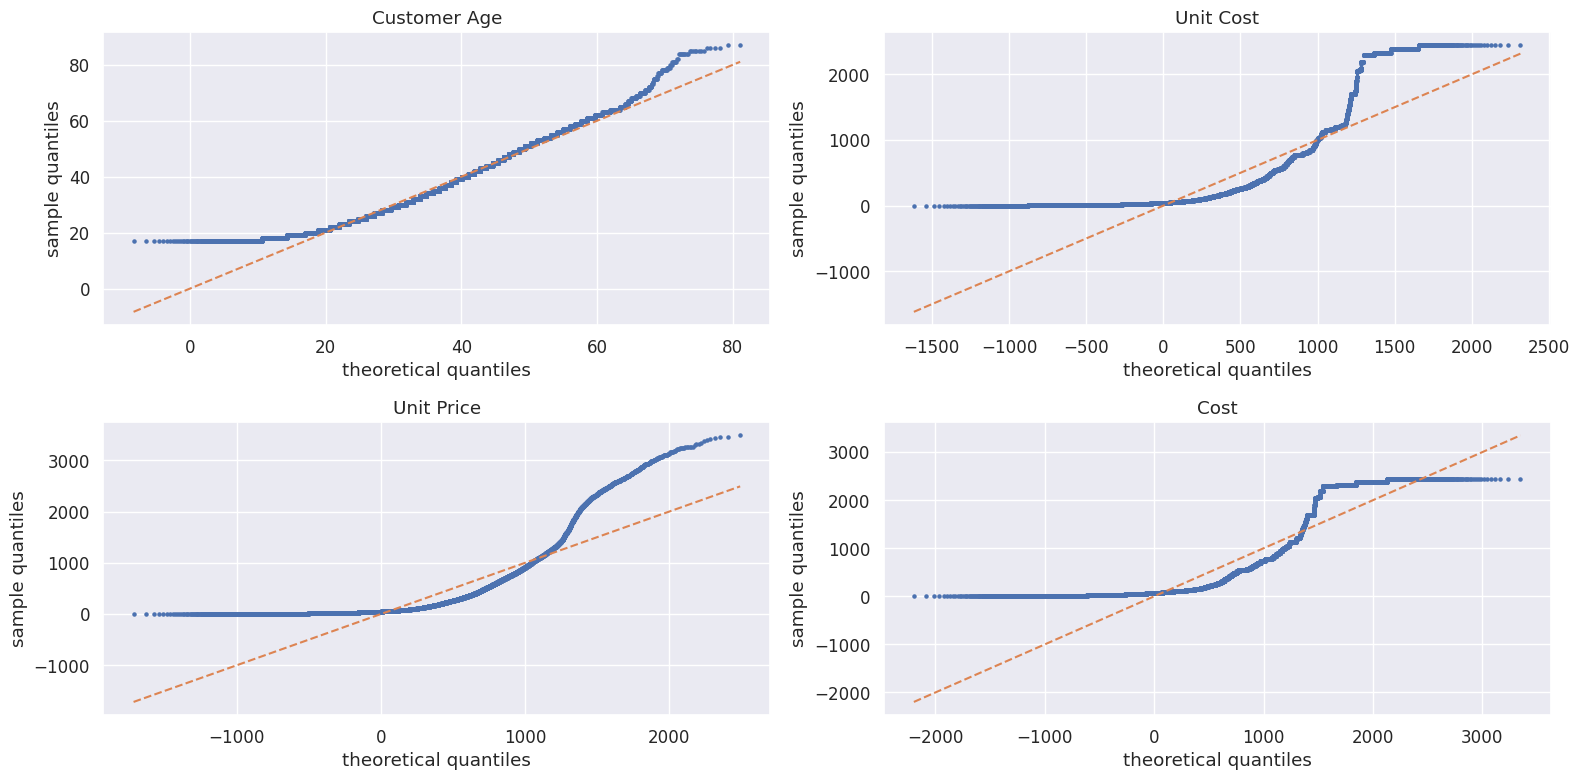

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16, 8)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('theoretical quantiles')
    ax.set_ylabel('sample quantiles')
    
plt.tight_layout()
plt.show()

### Стастические показатели для выборок

Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:
- Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$;
- В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$;
- В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$;

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

На основании такой оценки в `Customer Age` процент данных, попадающих в пределы 1, 2 и 3 стандартных отклонений от среднего значения, очень близок к теоретическим процентам (68%, 95% и 99,7% соответственно), что указывает на то, что данные распределены приблизительно нормально.

С другой стороны, мы не можем сказать, что `Unit Cost`, `Unit Price` и `Cost` распределены нормально, так как процент данных, попадающих в пределы 1, 2 и 3 стандартных отклонений от среднего значения, недостаточно близки к теоретическим процентам.

In [ ]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()
     

Customer Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6552861856261656
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9664897432219194
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9964137139578253

Unit Cost
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8887677521159087
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9569645674939034
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9670348587003299

Unit Price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.879414718117917
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9507961555013628
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.968698895423899

Cost
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8650982642375555
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9024817099411849
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



## Регрессия между возрастом и ценой покупки, есть ли?
### Визуализация

На графике тяжело с ходу понять, есть ли какие-то явные зависимости. Визуально кажется, что чем старше люди, тем меньше они тратят денег на покупку.

In [ ]:
df

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000
34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000
34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000


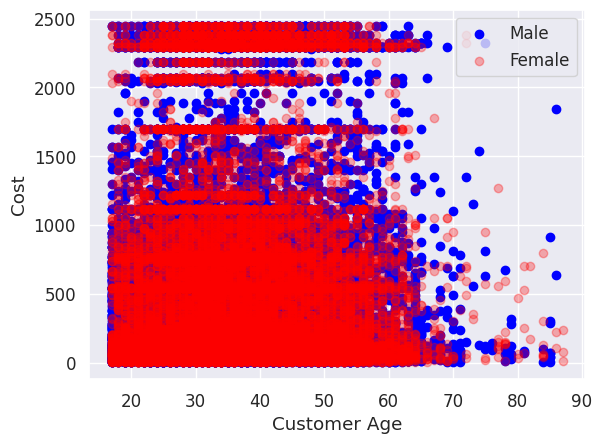

In [ ]:
male_data = df[df['Customer Gender'] == 'M']
female_data = df[df['Customer Gender'] == 'F']

plt.scatter(male_data['Customer Age'], male_data['Cost'], c='blue', label='Male')
plt.scatter(female_data['Customer Age'], female_data['Cost'], c='red', label='Female', alpha = 0.3)

plt.xlabel('Customer Age')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Рассчёт регрессии и проверка значимости
Рассчитаем коэффициенты регрессии и значения для для каждого из значений выборок. Мы видим почти полное отсутствие линейной зависимости.

In [ ]:
ones = np.ones((len(df['Customer Age']),1))
x_pot = np.hstack((ones, df['Customer Age'].values.reshape(len(df['Customer Age']),1)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Cost'])
z = x_pot.dot(b)
e = df['Cost'] - z
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Cost']))
R

0.0005308623597560791

### Статистический тест
Построим статистический тест с нулевой гипотезой о том, что зависимости между возрастом покупателя и ценой покупки нет.

Однако, мы увидим, что не смотря на малое значение коэффициента детерминации эта зависимость всё же есть. Больше возраст - меньше денег тратится на покупку.

In [ ]:
n = len(df['Customer Age'])
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 34853)

In [ ]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8417256445125414

In [ ]:
F = (R / k1) / ((1 - R) / k2)
F

18.51197313432045

Так как результат расчёта $F>t$, то зависимость есть.

### Визуализация зависимости

Визуализировав зависимость, мы и вправду видим некоторую связь между возрастом и ценой покупки.

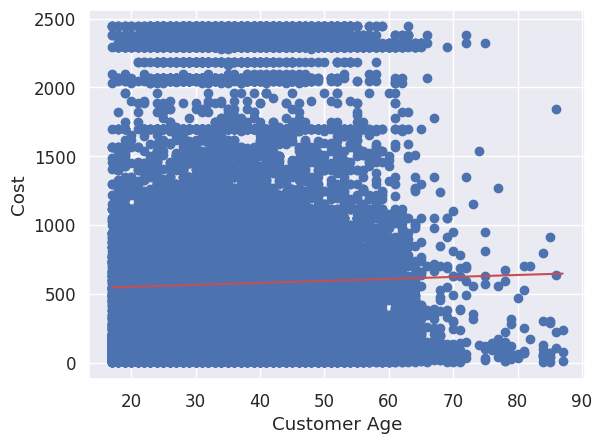

In [ ]:
from sklearn.linear_model import LinearRegression

# создать объект регрессии и обучить его на данных
reg = LinearRegression().fit(df[['Customer Age']], df['Cost'])

# получить значения коэффициентов угла наклона и пересечения осей
b1 = reg.coef_[0]
b0 = reg.intercept_

# нарисовать точки и линию регрессии
plt.scatter(df['Customer Age'], df['Cost'])
plt.xlabel('Customer Age')
plt.ylabel('Cost')
x = np.linspace(17, 87, 1000)
y = b0 + b1*x
plt.plot(x, y, color='r')
plt.show()

## Верно ли, что женщины тратят больше денег на покупки, чем мужчины?

Разделим нашу выборку на две части с покупками только женщинами и с покупками мужчинами.

Так как $F<t$, то можно точно сказать, что цена покупки не зависит от пола.

In [ ]:
def var_analise(df, df1, df2, f):
    all1 = df1.shape[0]
    all2 = df2.shape[0]
    res1_mean = df1[f].mean()
    res2_mean = df2[f].mean()
    res_mean = df[f].mean()
    SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
    SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

    k = 2
    n = all1 + all2
    k1 = k - 1
    k2 = n - k
    sigma2_b = SS_b / k1
    sigma2_w = SS_w / k2
    sigma2_b, sigma2_w

    F = sigma2_b / sigma2_w

    alpha = 0.05

    t = stats.f.ppf(1 - alpha, k1, k2)
    print(F, t)
    return F>t

In [ ]:
df1 = df[df['Customer Gender'] == 'F']
df2 = df[df['Customer Gender'] == 'M']

In [ ]:
var_analise(df, df1, df2, 'Cost')

0.032545158447929864 3.841725652213006


False

In [ ]:
res1_mean = df1['Cost'].mean()
res2_mean = df2['Cost'].mean()

print(f'Women: {res1_mean}, Men: {res2_mean}')

Women: 575.822477575189, Men: 574.4906444906445


## Правда ли, что количество купленных вещей зависит от цены?
Построим ради интереса матрицу корелляции.

Уже на этом этапе видна отсутствующая зависимость `Quantity` от `Cost`

<ipython-input-60-8c31fa19778f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


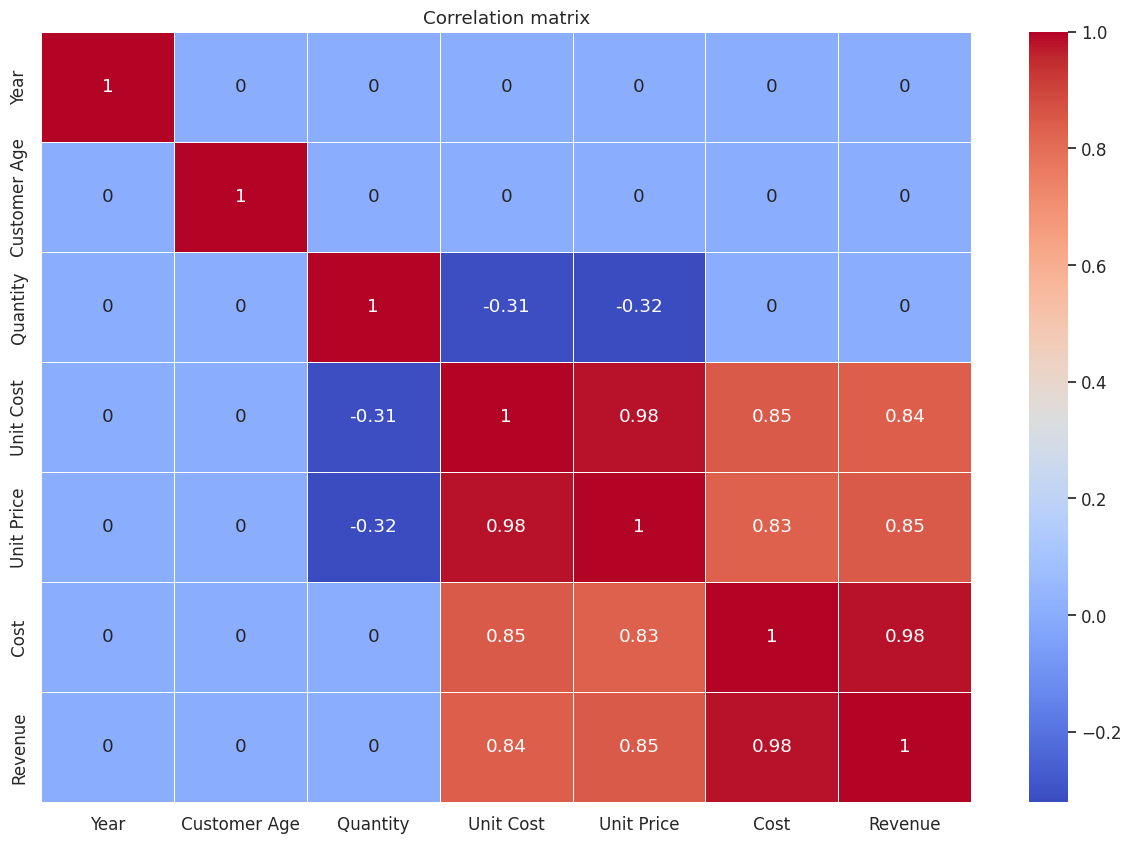

Pearson correlation coefficient: 0.01
p-value: 0.10686


In [ ]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0  # Отсекаем маленьеи корелляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Quantity'], df['Cost'])
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"p-value: {p_value:.5f}")

Значение коэффициента корреляции Пирсона равное 0.01 говорит о том, что между столбцами 'Quantity' и 'Cost' очень слабая положительная зависимость. При этом значение p-значения равное 0.10686 больше уровня статистической значимости 0.05, что означает, что мы не можем отвергнуть нулевую гипотезу о том, что коэффициент корреляции равен 0 (т.е. нет зависимости между столбцами) на уровне значимости 0.05.

Таким образом, можно сделать вывод, что на основе данной выборки данных, нельзя утверждать о наличии статистически значимой зависимости между количеством купленных вещей и ценой. Однако, стоит учитывать, что коэффициент корреляции Пирсона может не всегда отражать все аспекты зависимости между переменными, и в некоторых случаях может быть полезно использовать другие метрики корреляции или методы анализа зависимостей.

## Как зависит цена покупки от страны?
Мы видим, что в Германии средняя цена покупки выше, чем в других странах.

Также можно заметить, что цена покупки в США ниже, чем в других странах.

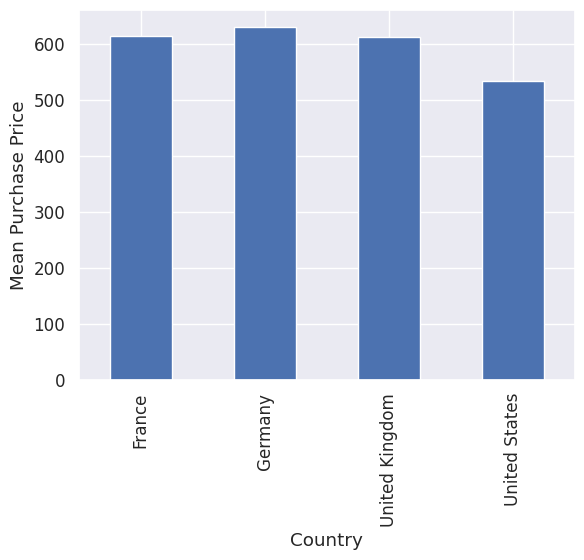

In [ ]:
grouped = df.groupby('Country')['Cost'].mean()

grouped.plot(kind='bar')
plt.ylabel('Mean Purchase Price')
plt.show()

## Как зависит цена покупки от категории продукта?
Мы видим, что дороже всего покупки в категории "Bikes", а дешевле всего в категории "Accessories"

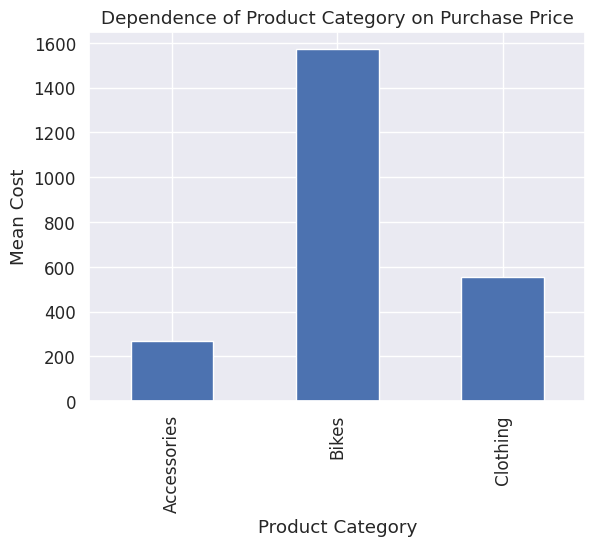

In [ ]:
category_cost = df.groupby('Product Category')['Cost'].mean()

category_cost.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Mean Cost')
plt.title('Dependence of Product Category on Purchase Price')
plt.show()

### Влияет ли пол на категорию покупки?
Проведём дисперсионный анализ для всех пар выборок и построим график разброса результата.

В этом случае чрезвычайно малая F-статистика 8.365632561113995e-06 указывает на то, что дисперсия между группами очень мала по сравнению с дисперсией внутри групп. Это говорит о том, что пол практически не влияет на категорию покупок. Значение p, равное 0,9978307485362048, очень велико, что указывает на высокую вероятность наблюдения такой F-статистики только случайно, учитывая нулевую гипотезу об отсутствии эффекта. Таким образом, мы можем сделать вывод, что пол не является значимым предиктором категории покупок.

In [ ]:
from scipy.stats import f_oneway

grouped_df = df.groupby(['Customer Gender', 'Product Category'])['Cost'].mean().reset_index()

# Perform the ANOVA test
result = f_oneway(grouped_df[grouped_df['Customer Gender']=='F']['Cost'],
                   grouped_df[grouped_df['Customer Gender']=='M']['Cost'])

# Print the results
print('F-statistic:', result.statistic)
print('p-value:', result.pvalue)

F-statistic: 8.365632561113995e-06
p-value: 0.9978307485362048


<Axes: xlabel='Product Category', ylabel='Cost'>

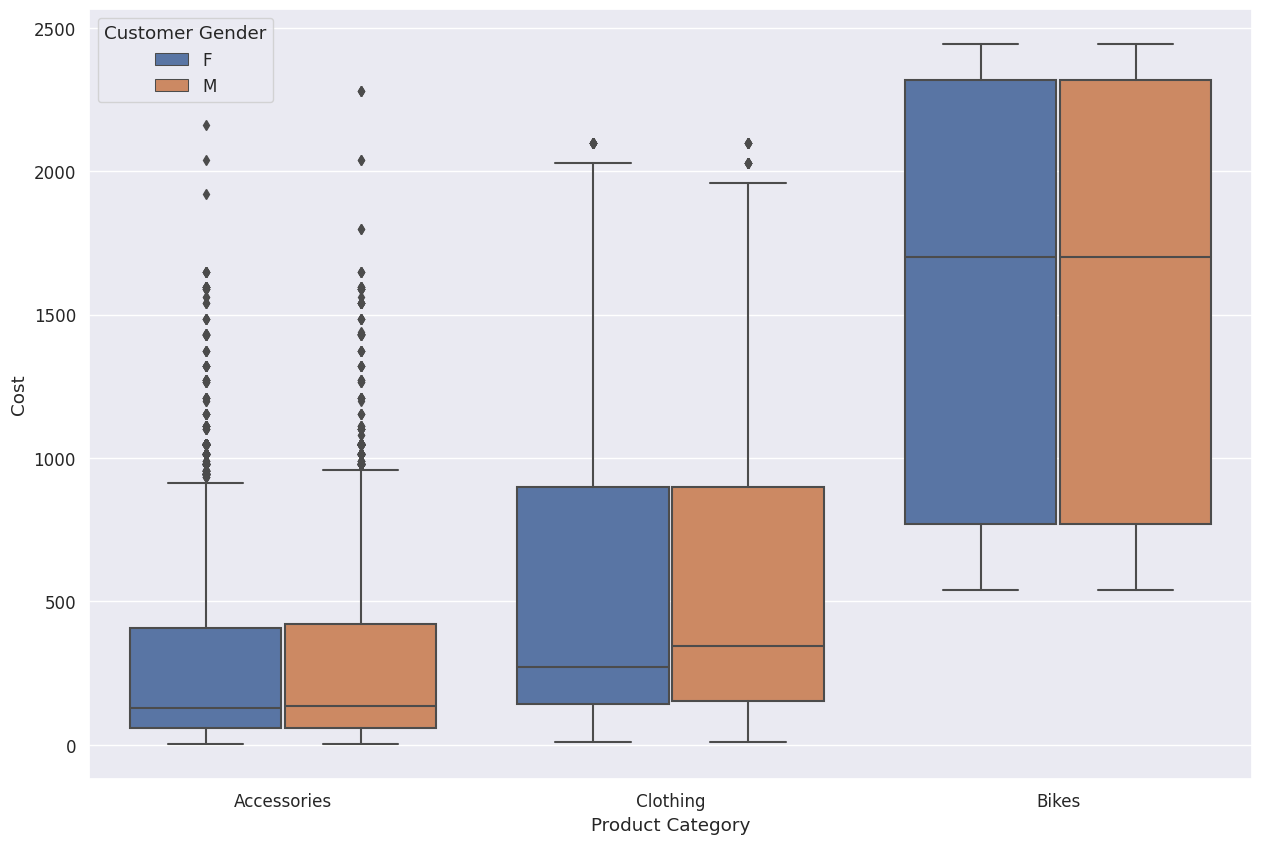

In [ ]:
import seaborn as sns

# Create a boxplot of the revenue generated by each gender in each product category
plt.figure(figsize=(15, 10))
sns.boxplot(x='Product Category', y='Cost', hue='Customer Gender', data=df)

# Выводы
Анализ приведенных данных дал нам ценную информацию о различных аспектах покупок клиентов. 

Мы обнаружили, что большинство покупок в данных связаны с покупкой двух единиц товара, а норма прибыли относительно невелика. 

В то время как возраст покупателя распределяется приблизительно нормально, параметры себестоимости единицы, цена за единицу и себестоимость обычно не распределяются. Мы наблюдали слабую корреляцию между возрастом покупателя и ценой покупки, а пол не является значимым предиктором категории покупок. 

Кроме того, мы обнаружили, что самые дорогие покупки совершаются в категории "Велосипеды", а самые дешевые - в категории "Аксессуары". 

Проведенный анализ помог нам выявить ключевые факторы, влияющие на покупки клиентов, что может помочь в принятии обоснованных решений относительно будущих стратегий продаж.